## Emoji Diversity - Permutation Test

#### imports and loads

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib, mplcairo
import pickle
print('Default backend: ' + matplotlib.get_backend()) 
#matplotlib.use("module://mplcairo.macosx")
#print('Backend is now ' + matplotlib.get_backend())
sns.set()

path_root = "/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/"
groupsAndCountsPath = path_root + "emoticon_analysis/tr_emoticon_groups_and_counts.csv"
emojisPath = path_root + "emoticon_analysis/emojis.csv"
path_in = path_root+ "tr_emoanalysis.parquet"
path_in_en= path_root + "en_emoanalysis.parquet"
#Existing emojis
groupsAndCountsDfEn = pd.read_csv(path_root + "emoticon_analysis/en_emoticon_groups_and_counts.csv")
groupsAndCountsDfTr = pd.read_csv(groupsAndCountsPath)
#Emoji codes
emojisdf = pd.read_csv(emojisPath)

cscPathTr = path_root + "emoticon_analysis/count_matrices/tr/csc_count.npz"
featuresPathTr = path_root + "emoticon_analysis/count_matrices/tr/feature_names.npy"

cscPathEn = path_root + "emoticon_analysis/count_matrices/en/csc_count.npz"
featuresPathEn = path_root + "emoticon_analysis/count_matrices/en/feature_names.npy"

cscCountsMatrixTr = scipy.sparse.load_npz(cscPathTr)
featureNamesArrayTr = np.load(featuresPathTr,allow_pickle=True)

cscCountsMatrixEn = scipy.sparse.load_npz(cscPathEn)
featureNamesArrayEn = np.load(featuresPathEn,allow_pickle=True)

dfTr = pd.read_parquet(path_in,columns=["id","created_at","company","type","industry","gender"])
dfEn = pd.read_parquet(path_in_en,columns=["id","created_at","company","type","industry","gender"])

Default backend: module://matplotlib_inline.backend_inline


#### Simulation

In [4]:
def getDiversity(N,mtrx,featureNames):
    pagesize = int(mtrx.shape[0]/N)
    dives =[]
    prevpage = 0
    currentpage=1
    for page in range(1,pagesize+1):
        countsData=pd.DataFrame(mtrx[prevpage*N:currentpage*N].sum(axis=0).T,index=featureNames).sort_values(by=0,ascending=False)
        if(len(countsData)>0 and countsData.sum()[0]>0):
            diversity = len(countsData[countsData[0]>0])/countsData.sum()[0]
            dives.append(diversity)
            #else:
            #    divesTr.append(0)
        prevpage+=1
        currentpage+=1            
    return np.array(dives)


In [5]:
#sample tr: 500.000
#sample en: 2000.000

maxRun = 1000

sizeTotal = 150000
propTr = 0.1
propEn = 0.9


resultsEn = []
resultsTr = []

for i in range(maxRun):
    print("Run:",i)
    propRnd = np.random.ranf()
    idxFromTr = np.random.randint(0,cscCountsMatrixTr.shape[0],size=int(sizeTotal/2))
    idxFromEn = np.random.randint(0,cscCountsMatrixEn.shape[0],size=int(sizeTotal/2))

    sampleFromTr = cscCountsMatrixTr[idxFromTr]
    sampleFromEn = cscCountsMatrixEn[idxFromEn]

    idxFromTr2 = np.random.randint(0,sampleFromTr.shape[0],size=int(sampleFromTr.shape[0]*propTr))
    idxFromEn2 = np.random.randint(0,sampleFromEn.shape[0],size=int(sampleFromEn.shape[0]*propTr))

    sampleFromTrforTr = sampleFromTr[idxFromTr2]
    sampleFromEnforTr = sampleFromEn[idxFromEn2]


    idxFromTr3 = np.random.randint(0,sampleFromTr.shape[0],size=int(sampleFromTr.shape[0]*propEn))
    idxFromEn3 = np.random.randint(0,sampleFromEn.shape[0],size=int(sampleFromEn.shape[0]*propEn))

    sampleFromTrforEn = sampleFromTr[idxFromTr3]
    sampleFromEnforEn = sampleFromEn[idxFromEn3]

    divesTr1 = getDiversity(1000,sampleFromTrforEn,featureNamesArrayTr)
    divesTr2 = getDiversity(1000,sampleFromEnforEn,featureNamesArrayEn)

    divesEn1 = getDiversity(1000,sampleFromTrforEn,featureNamesArrayTr)
    divesEn2 = getDiversity(1000,sampleFromEnforEn,featureNamesArrayEn)

    statTr = (np.mean(divesTr1 + np.mean(divesTr2)))/2.0
    statEn = (np.mean(divesEn1) + np.mean(divesEn2))/2.0

    resultsTr.append(statTr)
    resultsEn.append(statEn)




Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Run: 50
Run: 51
Run: 52
Run: 53
Run: 54
Run: 55
Run: 56
Run: 57
Run: 58
Run: 59
Run: 60
Run: 61
Run: 62
Run: 63
Run: 64
Run: 65
Run: 66
Run: 67
Run: 68
Run: 69
Run: 70
Run: 71
Run: 72
Run: 73
Run: 74
Run: 75
Run: 76
Run: 77
Run: 78
Run: 79
Run: 80
Run: 81
Run: 82
Run: 83
Run: 84
Run: 85
Run: 86
Run: 87
Run: 88
Run: 89
Run: 90
Run: 91
Run: 92
Run: 93
Run: 94
Run: 95
Run: 96
Run: 97
Run: 98
Run: 99
Run: 100
Run: 101
Run: 102
Run: 103
Run: 104
Run: 105
Run: 106
Run: 107
Run: 108
Run: 109
Run: 110
Run: 111
Run: 112
Run: 113
Run: 114
Run: 115
Run: 116
Run: 117
Run: 118
Run: 119
Run: 120
Run: 121
Run: 122
Run

#### Reports

In [6]:
resultsEn = np.array(resultsEn)
resultsTr = np.array(resultsTr)

In [9]:
resultsEn.mean()

0.35032874451851714

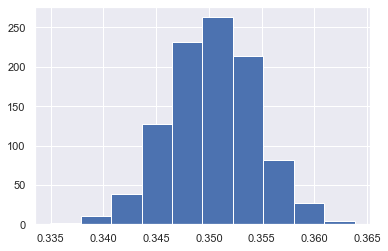

In [7]:
plt.hist(resultsEn)
plt.show()

In [10]:
import pickle
pickle.dump(resultsEn,open(path_root+ 'simulation_results/results_en.p','wb'))

In [11]:
pickle.dump(resultsTr,open(path_root+ 'simulation_results/results_tr.p','wb'))

In [12]:
#load data

resultsEn = pickle.load(open(path_root+ 'simulation_results/results_en.p','rb'))
resultsTr = pickle.load(open(path_root+ 'simulation_results/results_tr.p','rb'))

In [14]:
resultsEn.mean()

0.35032874451851714

In [15]:
resultsEn.std()

0.0040938489437704895

In [16]:
#resultsEn = resultsEn[~np.isnan(resultsEn).any(axis=0)]
#resultsEn = np.array(resultsEn)
pval=  (resultsEn[resultsEn<0.33].shape[0]+resultsEn[resultsEn>0.37].shape[0]) /resultsEn.shape[0]
print(pval)

0.0


In [19]:
resultsEn[resultsEn<0.33].shape

(0,)

In [74]:
type(resultsEn)

list

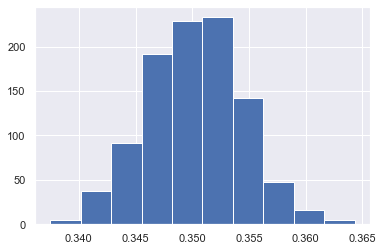

In [11]:
plt.hist(resultsTr)
plt.show()

In [12]:
#resultsTr = np.array(resultsTr)
pval=  resultsTr[resultsTr<0.29].shape[0] /resultsTr.shape[0]
print(pval)

0.0


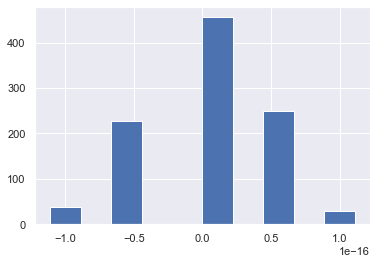

In [13]:
plt.hist(resultsEn - resultsTr)
plt.show()

In [14]:
#English Diversity: 0.3302349679344071
#Turkish Diversity: 0.2935997063934076

#diff = 0.04
#resultsTr = resultsTr.resize(resultsEn.shape[0])
dataDiff = np.array(resultsEn) - np.array(resultsTr)

pval=  dataDiff[dataDiff>0.04].shape[0] /dataDiff.shape[0]
print(pval)



0.0
